In [88]:
!pip install scikit-surprise
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/data science/starRatings.csv')

In [90]:
# Load the dataset
file_path = '/content/drive/MyDrive/data science/spotify52kData.csv'  # Replace with your file path
spotify_data = pd.read_csv(file_path)

In [91]:
# Assuming df is your DataFrame and 'genre' is the column where you want to make the change
# Replace 'alt' with 'alternative rock' in the 'genre' column
spotify_data['track_genre'] = spotify_data['track_genre'].replace('alternative', 'alt-rock')



# Check for duplicate rows
spotify_data.drop('songNumber', axis=1, inplace=True)
duplicates = spotify_data.duplicated().sum()
nulls=spotify_data.duplicated().isna().sum()


print(f"Number of duplicate rows in the dataset: {duplicates}")
print(f"Number of nulls in the dataset: {nulls}")

spotify_data_dropped=spotify_data.drop_duplicates()
print(spotify_data_dropped.shape)

spotify_data = spotify_data_dropped


Number of duplicate rows in the dataset: 863
Number of nulls in the dataset: 0
(51137, 19)


In [92]:
df

,NaN,NaN.1,NaN.2,NaN.3,NaN.4,NaN.5,NaN.6,NaN.7,NaN.8,NaN.9,...,NaN.4462,0.152,NaN.4463,NaN.4464,NaN.4465,NaN.4466,NaN.4467,NaN.4468,NaN.4469,NaN.4470
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
spotify_data['track_name'][0:5000]

0                                                  Comedy
1                                        Ghost - Acoustic
2                                          To Begin Again
3                              Can't Help Falling In Love
4                                                 Hold On
                              ...                        
5597                             Atraparlos Ya! (Pokemon)
5598                                          Rap de Buda
5599    Quiero Gritar Te Amo (Version 2017 ) [From "Sl...
5600                                                   黒点
5601                                                 百花繚乱
Name: track_name, Length: 5000, dtype: object

In [94]:
column_names = spotify_data['track_name'][0:5000].values

In [95]:
# Assuming 'data' is a DataFrame without headers, we can add the column names directly
df.columns = column_names
print(len(df.columns))
print(df.shape)

5000
(9999, 5000)


In [96]:
df

,Comedy,Ghost - Acoustic,To Begin Again,Can't Help Falling In Love,Hold On,Days I Will Remember,Say Something,I'm Yours,Lucky,Hunger,...,サムライハート(Some Like It Hot!!),Merry Christmas Mr. Lawrence,Devilman No Uta,私,Sola Nunca Estarás,Atraparlos Ya! (Pokemon),Rap de Buda,"Quiero Gritar Te Amo (Version 2017 ) [From ""Slam Dunk""]",黒点,百花繚乱
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df.index.name = "UserID"

In [98]:
average_rating= []
for i in range(5000):
    df_nona = df.iloc[:, i].dropna()
    average_rating.append(df_nona.mean())


In [99]:
master_data = spotify_data.iloc[0:5000,:]

In [100]:
master_data

,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.032200,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.924000,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.210000,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.905000,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.469000,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5597,The Covers Duo,Anime Openings 1,Atraparlos Ya! (Pokemon),36,60010,False,0.654,0.8560,10,-5.207,1,0.0344,0.029200,0.000000,0.3750,0.700,144.954,4,anime
5598,Doblecero,Rap de Buda,Rap de Buda,37,219536,False,0.743,0.7430,4,-6.982,0,0.2710,0.184000,0.000000,0.0864,0.656,200.119,4,anime
5599,Adrian Barba,"Ángeles Fuimos, Somos y Seremos","Quiero Gritar Te Amo (Version 2017 ) [From ""Sl...",36,228645,False,0.670,0.8410,5,-5.717,1,0.0971,0.054700,0.000000,0.3570,0.622,141.974,4,anime
5600,Yasuharu Takanashi;YAIBA,NARUTO-ナルト- 疾風伝 オリジナル・サウンドトラック Ⅱ,黒点,44,136333,False,0.465,0.8730,5,-8.205,1,0.0400,0.000005,0.873000,0.1270,0.139,91.986,4,anime


In [101]:
master_data['average_rating'] = average_rating

<ipython-input-101-16a9f66b306d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_data['average_rating'] = average_rating


In [102]:
master_data

,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,average_rating
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.032200,0.000001,0.3580,0.715,87.917,4,acoustic,3.196939
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.924000,0.000006,0.1010,0.267,77.489,4,acoustic,1.361029
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.210000,0.000000,0.1170,0.120,76.332,4,acoustic,2.186377
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.905000,0.000071,0.1320,0.143,181.740,3,acoustic,1.576998
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.469000,0.000000,0.0829,0.167,119.949,4,acoustic,3.038835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5597,The Covers Duo,Anime Openings 1,Atraparlos Ya! (Pokemon),36,60010,False,0.654,0.8560,10,-5.207,1,0.0344,0.029200,0.000000,0.3750,0.700,144.954,4,anime,0.833843
5598,Doblecero,Rap de Buda,Rap de Buda,37,219536,False,0.743,0.7430,4,-6.982,0,0.2710,0.184000,0.000000,0.0864,0.656,200.119,4,anime,2.368473
5599,Adrian Barba,"Ángeles Fuimos, Somos y Seremos","Quiero Gritar Te Amo (Version 2017 ) [From ""Sl...",36,228645,False,0.670,0.8410,5,-5.717,1,0.0971,0.054700,0.000000,0.3570,0.622,141.974,4,anime,0.914201
5600,Yasuharu Takanashi;YAIBA,NARUTO-ナルト- 疾風伝 オリジナル・サウンドトラック Ⅱ,黒点,44,136333,False,0.465,0.8730,5,-8.205,1,0.0400,0.000005,0.873000,0.1270,0.139,91.986,4,anime,0.890088


In [103]:
correlation = master_data['popularity'].corr(master_data['average_rating'])
correlation

0.1656758704400314

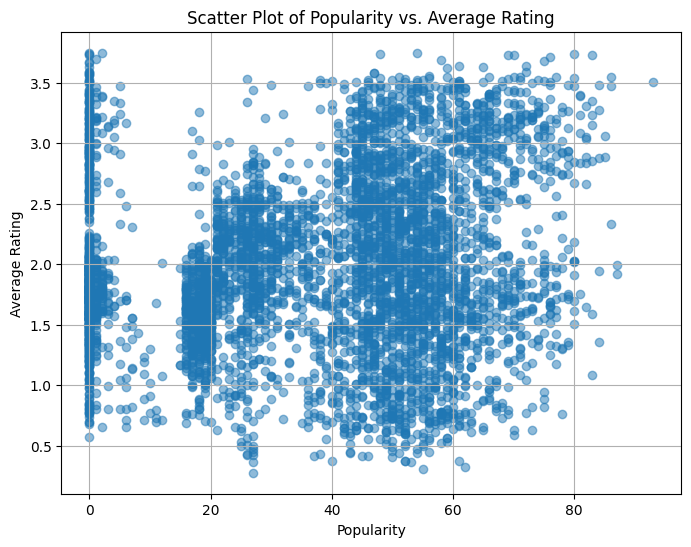

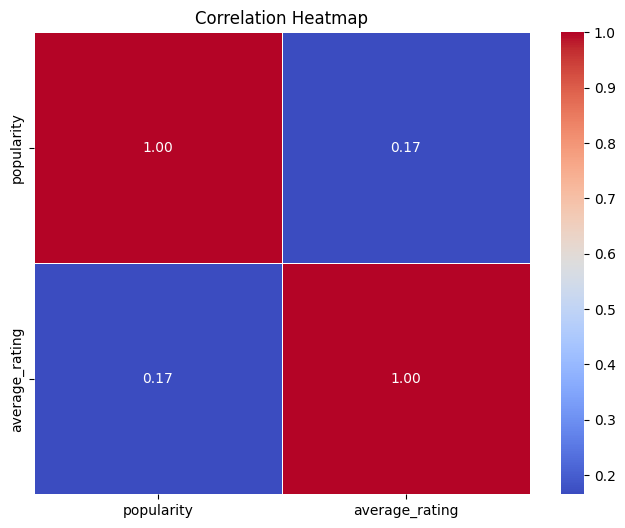

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'popularity_model' with 'popularity' and 'average_rating' columns

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(master_data['popularity'], master_data['average_rating'], alpha=0.5)
plt.title('Scatter Plot of Popularity vs. Average Rating')
plt.xlabel('Popularity')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# Heatmap
correlation_matrix = master_data[['popularity', 'average_rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [105]:
import numpy as np
import pandas as pd
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise import accuracy


df_copy = df.copy()

long_format_df = df_copy.stack().reset_index()
long_format_df.columns = ['user', 'song', 'rating']

long_format_df = long_format_df.dropna()
average_rating = long_format_df[long_format_df['rating'] != 0]['rating'].mean()
long_format_df['rating'].replace(0, average_rating, inplace=True)



In [106]:
long_format_df

,user,song,rating
0,0,Winter Wonderland,2.511821
1,0,Winter Wonderland,2.000000
2,0,All I Want For Christmas Is A Real Good Tan,2.511821
3,0,Party of One,2.000000
4,0,You and Me on the Rock,4.000000
...,...,...,...
4995639,9998,Lies (Itachi Rap) [feat. Eddie Rath],1.000000
4995640,9998,One Piece x Pirates of The Caribbean,2.000000
4995641,9998,Hang On,3.000000
4995642,9998,Merry Christmas Mr. Lawrence,1.000000


In [107]:
import sqlite3
import pandas as pd

# Assuming df is your DataFrame

# Create a new SQLite database (or connect to an existing one)
conn = sqlite3.connect('my_database.db')

# Save the DataFrame to a new table in the database
long_format_df.to_sql('my_table', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [108]:
df_train = long_format_df[long_format_df['user'] <= 8000]
df_val= long_format_df[long_format_df['user'] > 8000]

In [109]:
df_train.shape

(3996820, 3)

In [110]:
df_val.shape

(998824, 3)

In [111]:
train = df_train

In [112]:
val = df_val

In [113]:
# Subset the columns
train = train[["song", "rating"]]
train.head()

,song,rating
0,Winter Wonderland,2.511821
1,Winter Wonderland,2.000000
2,All I Want For Christmas Is A Real Good Tan,2.511821
3,Party of One,2.000000
4,You and Me on the Rock,4.000000


In [115]:
train = train.groupby("song").agg({"rating":"mean"})
train

,rating
song,
"""Something In the Rain"" (Something In the Rain, Pt. 1) [Music from the Original TV Series]",2.425460
#1,2.391877
#3,3.276078
#Jetsgo,3.260280
(I Just) Died In Your Arms - Acoustic,2.539304
...,...
静寂のアポストル,2.405930
音タイム,2.323669
魔法,2.279798


In [116]:
train = train.sort_values(by = "rating", ascending=False)
train

,rating
song,
Small Memory,3.754350
Snow (Hey Oh),3.750614
Tudo Que Ela Gosta De Escutar - Ao Vivo,3.739796
Una Mattina,3.729974
You Get Me So High,3.720223
...,...
End Up,2.063874
saman,2.063804
Glassworks: Opening,2.057840


In [117]:
# Great Hits
train.head(10)

,rating
song,
Small Memory,3.754350
Snow (Hey Oh),3.750614
Tudo Que Ela Gosta De Escutar - Ao Vivo,3.739796
Una Mattina,3.729974
You Get Me So High,3.720223
Land of Confusion,3.703285
White Christmas,3.686456
What I've Done,3.680533
I'm a Firefighter,3.654835


In [118]:
# Number of users in the validation data
users = val['user'].unique()
users

array([8001, 8002, 8003, ..., 9996, 9997, 9998])

In [119]:
users.sort()
users

array([8001, 8002, 8003, ..., 9996, 9997, 9998])

In [120]:
# Number of movies that we recommend to each user
numrecs = 10

In [121]:
# We recommend everyone in the validation set the 10 movies that we learned from the training set
top = np.array(train.head(numrecs).index)
recs = [top.tolist()] * len(users) # we recommend the same movies to everyone

In [122]:
val = val.sort_values("rating", ascending=False).groupby("user")
val

In [123]:
# We want to get the group corresponding to the userId 8050
print (val.get_group(8050).shape)
val.get_group(8050).head()

(519, 3)


,user,song,rating
4021751,8050,Ever Enough,4.0
4021749,8050,"I'm Your Boogieman - From ""The Crow: City Of A...",4.0
4021747,8050,Buscando un Símbolo de Paz,4.0
4021761,8050,Un Osito de Peluche de Taiwán (feat. Fernando ...,4.0
4021775,8050,Ella Baila Con Todos,4.0


In [124]:
# get the movies rated by userId 8050 in descending order
val.get_group(8050)["song"].values

array(['Ever Enough',
       'I\'m Your Boogieman - From "The Crow: City Of Angels" Soundtrack',
       'Buscando un Símbolo de Paz',
       'Un Osito de Peluche de Taiwán (feat. Fernando Ruiz Díaz) - Vivo en el Palacio de los Deportes',
       'Ella Baila Con Todos', 'Tornado Of Souls - Remastered 2004',
       'Para No Verme Más - En Vivo', 'Trains - Remastered', 'Atmosphere',
       'Mute', "Please Don't Leave Just Yet",
       'Brace for Impact - Live a Little', 'Wicked Ways',
       'In For The Kill', 'Runaway Horses - Abridged', 'Blood // Water',
       'Oxe', 'You And Me', 'Epiphany', 'Mr. Brightside',
       'Everybody Talks', 'Sway', 'Como Eran Las Cosas', 'Call Me a Fool',
       'Motives', 'Night Walk',
       'Nuvole Bianche - Reimagined by Mercan Dede', 'Lion Theme',
       'Mid Air', 'Snow', 'Dreams Are Real', 'Domestic Pressures',
       'Bless Those Tired Eyes', 'Sweet Pain', 'Filma Solo',
       'Gotoubun no Kimochi', 'Darkest Night', 'Always Be My Baby',
       'Angel

In [125]:
val.get_group(8050)["song"].tolist()

['Ever Enough',
 'I\'m Your Boogieman - From "The Crow: City Of Angels" Soundtrack',
 'Buscando un Símbolo de Paz',
 'Un Osito de Peluche de Taiwán (feat. Fernando Ruiz Díaz) - Vivo en el Palacio de los Deportes',
 'Ella Baila Con Todos',
 'Tornado Of Souls - Remastered 2004',
 'Para No Verme Más - En Vivo',
 'Trains - Remastered',
 'Atmosphere',
 'Mute',
 "Please Don't Leave Just Yet",
 'Brace for Impact - Live a Little',
 'Wicked Ways',
 'In For The Kill',
 'Runaway Horses - Abridged',
 'Blood // Water',
 'Oxe',
 'You And Me',
 'Epiphany',
 'Mr. Brightside',
 'Everybody Talks',
 'Sway',
 'Como Eran Las Cosas',
 'Call Me a Fool',
 'Motives',
 'Night Walk',
 'Nuvole Bianche - Reimagined by Mercan Dede',
 'Lion Theme',
 'Mid Air',
 'Snow',
 'Dreams Are Real',
 'Domestic Pressures',
 'Bless Those Tired Eyes',
 'Sweet Pain',
 'Filma Solo',
 'Gotoubun no Kimochi',
 'Darkest Night',
 'Always Be My Baby',
 'Angel of Death',
 'Welcome to Hell',
 'Without a Light',
 'Passenger Seat',
 'I Wanna

In [126]:
Y = list(map(lambda user: val.get_group(user)["song"].tolist(), users))

In [127]:
"""
Number of ratings corresponding to each userId in the validation set
"""
print (len(Y[0]))
print (len(Y[1]))
print (len(Y[2]))

487
491
509


In [132]:
"""
how many of the top k recommended items are relevant to the user
"""
precisions = []
def average_precision_at_k(actual, predicted, k=10):
    k = min(k,min(len(actual), len(predicted))) # at max 100, because we are predicting only top 100 movies for each user
    if len(actual) > k: # e.g. take the top 10 movies for each user based on actual data
      actual = actual[:k]
    if len(predicted) > k: # e.g. subset top 10 movies for that user
      predicted = predicted[:k]

    average_precision = 0.0

    # List of T/F values corresponding to every predicted movie indicating whether it is in the ground truth or not.
    relevant_inds = np.asarray([movie in actual for movie in predicted]) # for every movie index in the actuals, is the movie in predicted
    print ("relevant_inds", relevant_inds)

    num_relevant = np.sum(relevant_inds*1) # k-sized array [T, F ...  T] or [1, 0 ... 1]
    print ("num_relevant", num_relevant)

    if num_relevant == 0: # if no trues, then return 0
      return 0

    #  precision calculated at each index i of the predicted list.
    # Precision at index i is the number of relevant items found in the top i+1 predictions divided by i+1
    precision_at_k = np.asarray([(np.sum(relevant_inds[:i+1]*1.0)/(i+1)) for i in range(k)])
    print ("precision_at_k", precision_at_k)

    for ind in range(k):
      if relevant_inds[ind]:
        average_precision += precision_at_k[ind]

    average_precision /= num_relevant
    precisions.append(average_precision)
    return average_precision

In [133]:
def mean_average_precision_at_k(actual, predicted, k=10):
  # Here, actual/ground truth will be of the shape (num_users, num_movies)
  # We will run the average_precision_at_k function for every user and then take the mean of those values

  mean_average_precision = 0.0

  for user_ind in range(len(actual)):
    user_recommendation = predicted[user_ind]
    user_actual = actual[user_ind]

    ap = average_precision_at_k(user_actual, user_recommendation, k)

    mean_average_precision += ap

  mean_average_precision /= len(actual)

  return mean_average_precision

In [134]:
mean_average_precision_at_k(Y, recs)

relevant_inds [False False False False False False False False False False]
num_relevant 0
relevant_inds [False False False False False False False False False False]
num_relevant 0
relevant_inds [False False False False False False False False False False]
num_relevant 0
relevant_inds [False False False False False False False False False False]
num_relevant 0
relevant_inds [False False False False False False False False False False]
num_relevant 0
relevant_inds [False False False False False False False False False False]
num_relevant 0
relevant_inds [False False False False False False False False False False]
num_relevant 0
relevant_inds [False False False False False False False False False False]
num_relevant 0
relevant_inds [False False False False False False False False False False]
num_relevant 0
relevant_inds [False False False False False False False False False False]
num_relevant 0
relevant_inds [False False False False False False False False False False]
num_relevant 0

0.026106066383844186

In [137]:
unique_precisions = set(precisions)

In [138]:
unique_precisions_list = list(unique_precisions)

In [139]:
unique_precisions_list

[0.3333333333333333,
 0.22619047619047616,
 0.16666666666666666,
 0.14285714285714285,
 1.0,
 0.2,
 0.5,
 0.1111111111111111,
 0.125,
 0.25,
 0.75,
 0.29166666666666663,
 0.30952380952380953,
 0.1,
 0.2361111111111111]

In [58]:
# 2nd Approach just to learn new things
reader = Reader(rating_scale=(0, 4))

data = Dataset.load_from_df(long_format_df[['user', 'song', 'rating']], reader)

# Use the SVD algorithm
algo = SVD(n_factors=100, n_epochs=30, lr_all=0.005, reg_all=0.02, random_state = 16394389) # Using Net ID

# Train the algorithm on the whole dataset
trainset = data.build_full_trainset()
algo.fit(trainset)


In [86]:
# Given array of song titles
given_songs = np.array([['Sweater Weather'],
                        ['Daddy Issues'],
                        ['Miss You'],
                        ['abcdefu'],
                        ['Mr. Brightside'],
                        ['Softcore'],
                        ['In the End'],
                        ['Creep'],
                        ['Losing My Religion'],
                        ['Feel Good Inc.']])

# Convert the array to a list
given_songs_list = given_songs.flatten().tolist()

# Assuming 'column_names' maps song IDs to song names
# and 'algo' is your trained algorithm

all_predictions = []
user_match_count = {}

from operator import itemgetter
for user in trainset.all_users():
    user_id = trainset.to_raw_uid(user)
    user_song_rating = []
    for item in trainset.all_items():
        song_id = trainset.to_raw_iid(item)
        predicted_rating = algo.predict(user_id, song_id).est
        all_predictions.append((song_id, predicted_rating))
        user_song_rating.append(predicted_rating)
    top_10_songs = sorted(range(len(user_song_rating)), key=lambda i: user_song_rating[i], reverse=True)[:10]
    top_10_song_names = [column_names[song_id] for song_id in top_10_songs]
    print(top_10_song_names)
    # Count matches with the given_songs_list
    match_count = sum(song in given_songs_list for song in top_10_song_names)
    user_match_count[user_id] = match_count

# top_10_songs_id = dict(sorted(song_ratings.items(), key=itemgetter(1), reverse=True)[:10])
# print(column_names[list(top_10_songs_id.keys())])
# Print the number of matching songs for each user
print(user_match_count)


Streaming output truncated to the last 5000 lines.
['Wake Me Up', 'One Last Breath', 'Too Much Heaven', 'Calçada', 'Até de Manhã', 'Increase Comes From You', 'Cigar Time', 'A Great Big Sled', 'I Want More', 'Fallen Star']
['Victory', 'IN MY REMAINS', 'The Heart Asks Pleasure First', 'Born For This', 'The 1975', "I'm the One - Acoustic", 'Wisdom Seeker', 'No Les Creeré', 'Budos Dirge', 'All Things End']
['god(s)', 'One More Time Around', 'The 1975', 'Boca Fofa', 'Open', 'The Flood', 'Copperbelly', 'Yerberito', 'Ciencia De La Lluvia', 'Deléctrico']
['I Need You More Today', 'Reason', 'Just The Two Of Us', 'Headphones', 'Stand Your Ground', 'I Bet On Flying High', 'Sweeter', '明日の☆SHOW', 'Heart (Original Version)', 'きみはぼくのともだち']
["Pa' Congo", 'Mizin', 'Nightsky', 'The Past Recedes', "Don't Shoot Me Santa", "Ain't No Reason", 'Born For This', 'Harendra', 'Such A Simple Thing', 'IN MY REMAINS']
["C'est si bon", 'I Mean Love', 'Lambada de Oceanía, África y América', 'Black Summer', 'Pretty Bo

In [87]:

# Sort the user_match_count dictionary by match count in descending order
sorted_user_matches = sorted(user_match_count.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 users
top_10_users = sorted_user_matches[:10]

# Print the top 10 users and their match counts
for user_id, match_count in top_10_users:
    print(f"User: {user_id}, Matching Songs: {match_count}")


User: 455, Matching Songs: 2
User: 781, Matching Songs: 2
User: 905, Matching Songs: 2
User: 1037, Matching Songs: 2
User: 1246, Matching Songs: 2
User: 1257, Matching Songs: 2
User: 1273, Matching Songs: 2
User: 1653, Matching Songs: 2
User: 1800, Matching Songs: 2
User: 2274, Matching Songs: 2
